In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
SAMPLE = False

In [ ]:
KiVi_Sink = pd.read_csv('./results/KiVi-Sink/gsm8k_Llama3.1-8B-Instruct.csv')
KiVi_Sink2 = pd.read_csv('./results/KiVi-Sink/gsm8k_Qwen1.5-7B-Chat.csv')
KiVi_Sink = pd.concat([KiVi_Sink, KiVi_Sink2], ignore_index=True)
KiVi_Sink

FileNotFoundError: [Errno 2] No such file or directory: './results/KiVi-Sink/gsm8k_Llama3.1-8B-Instruct.csv'

In [3]:
#KiVi = pd.read_csv('./results/gsm8k_Meta-Llama-3.1-8B-Instruct.csv')
#KiVi2 = pd.read_csv('./results/gsm8k_Qwen1.5-7B-Chat.csv')
#KiVi = pd.concat([KiVi, KiVi2], ignore_index=True)
#KiVi = KiVi[KiVi['method'] == 'KiVi_2_128']
#KiVi

FileNotFoundError: [Errno 2] No such file or directory: './results/gsm8k_Meta-Llama-3.1-8B-Instruct.csv'

In [5]:
Combined = pd.concat([KiVi, KiVi_Sink], ignore_index=True)
Combined

,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_128,1,4.608443,687,meta-llama/Meta-Llama-3.1-8B-Instruct
1,A robe takes 2 bolts of blue fiber and half th...,1,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3,it takes 2 + 3 = 5 bolts of fiber.,NaN,KiVi_2_128,0,4.830964,633,meta-llama/Meta-Llama-3.1-8B-Instruct
2,Josh decides to try flipping a house. He buys...,2,The cost of the house and repairs came out to ...,70000,"osh buys a house for $80,000 and then puts in ...",NaN,KiVi_2_128,0,4.321244,772,meta-llama/Meta-Llama-3.1-8B-Instruct
3,James decides to run 3 sprints 3 times a week....,3,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540,NaN,NaN,KiVi_2_128,0,4.918567,614,meta-llama/Meta-Llama-3.1-8B-Instruct
4,"Every day, Wendi feeds each of her chickens th...",4,"If each chicken eats 3 cups of feed per day, t...",20,ach chicken gets per meal. Since she gives the...,NaN,KiVi_2_128,0,3.069212,1676,meta-llama/Meta-Llama-3.1-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...
5271,John had a son James when he was 19. James is...,1314,Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,8,"s old as Dora, who will be 12 in 3 years). If ...",21,KiViSink_2_128,0,4.195416,829,Qwen/Qwen1.5-7B-Chat
5272,There are some oranges in a basket. Ana spends...,1315,There are 60 minutes in an hour. Ana peels an ...,5,"han Jane after an hour, we first need to calcu...",25,KiViSink_2_128,0,4.141176,850,Qwen/Qwen1.5-7B-Chat
5273,Mark's car breaks down and he needs to get a n...,1316,The discount on the radiator was 400*.8=$<<400...,230,* 80% = $320. The installation cost is 3 hour...,470,KiViSink_2_128,0,4.439678,746,Qwen/Qwen1.5-7B-Chat
5274,"Farmer Brown has 20 animals on his farm, all e...",1317,Let C be the number of chickens.\nThere are 20...,5,r of chickens as \( ch \). We know that:\n\n- ...,7,KiViSink_2_128,0,4.011050,905,Qwen/Qwen1.5-7B-Chat


In [6]:
Combined_grouped = Combined[['method', 'model_name', 'accuracy']].groupby(['method', 'model_name']).mean().reset_index()
Combined_grouped

,method,model_name,accuracy
0,KiViSink_2_128,Qwen/Qwen1.5-7B-Chat,0.394238
1,KiViSink_2_128,meta-llama/Meta-Llama-3.1-8B-Instruct,0.184989
2,KiVi_2_128,Qwen/Qwen1.5-7B-Chat,0.398029
3,KiVi_2_128,meta-llama/Meta-Llama-3.1-8B-Instruct,0.180440


In [3]:
df = None
for root, dirs, files in os.walk('results'):
    for file in files:
        if file.endswith('.csv'):
            print(f'Processing {file}')
            if df is None:
                df = pd.read_csv(f'results/{file}')
            else:
                df = pd.concat([df, pd.read_csv(f'results/{file}')])

df          

Processing gsm8k_llama-3.1-8B-Instruct.csv
Processing gsm8k_llama3-8B-Instruct.csv
Processing gsm8k_Phi-3-medium-128k-instruct.csv
Processing gsm8k_Phi-3-mini-128k-instruct.csv
Processing gsm8k_Qwen1.5-1.8B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-1.8B-Chat.csv
Processing gsm8k_Qwen1.5-14B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-14B-Chat.csv
Processing gsm8k_Qwen1.5-32B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-32B-Chat.csv
Processing gsm8k_Qwen1.5-4B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-4B-Chat.csv
Processing gsm8k_Qwen1.5-7B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-7B-Chat.csv
Processing gsm8k_Qwen2-7B-Instruct.csv


,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,3 + 4 = 7 eggs per day. \n\nThe remainder of ...,18,baseline,1,16.000000,721,meta-llama/Meta-Llama-3.1-8B-Instruct
1,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_128,1,4.608443,687,meta-llama/Meta-Llama-3.1-8B-Instruct
2,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_192,1,5.912664,687,meta-llama/Meta-Llama-3.1-8B-Instruct
3,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_256,1,7.216885,687,meta-llama/Meta-Llama-3.1-8B-Instruct
4,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,es 9*2 = $<<9*2=18>>18 per day.\n#### 18,18,StreamingQuant_2_128,1,4.616058,685,meta-llama/Meta-Llama-3.1-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...
21099,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialStreamingQuant_2_192,0,5.708160,723,Qwen/Qwen2-7B-Instruct
21100,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = 56 slic...",NaN,PartialStreamingQuant_2_256,0,7.062147,708,Qwen/Qwen2-7B-Instruct
21101,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_128,0,4.471724,725,Qwen/Qwen2-7B-Instruct
21102,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_192,0,5.707586,725,Qwen/Qwen2-7B-Instruct


In [4]:
df['method'].unique()

array(['baseline', 'KiVi_2_128', 'KiVi_2_192', 'KiVi_2_256',
       'StreamingQuant_2_128', 'StreamingQuant_2_192',
       'StreamingQuant_2_256', 'LogQuant_2_128', 'LogQuant_2_192',
       'LogQuant_2_256', 'PartialStreamingQuant_2_128',
       'PartialStreamingQuant_2_192', 'PartialStreamingQuant_2_256',
       'PartialLogQuant_2_128', 'PartialLogQuant_2_192',
       'PartialLogQuant_2_256'], dtype=object)

In [6]:
df['model'] = df['model_name'].apply(lambda x: x.split('/')[-1])
df

,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name,model
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,3 + 4 = 7 eggs per day. \n\nThe remainder of ...,18,baseline,1,16.000000,721,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
1,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_128,1,4.608443,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
2,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_192,1,5.912664,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
3,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_256,1,7.216885,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
4,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,es 9*2 = $<<9*2=18>>18 per day.\n#### 18,18,StreamingQuant_2_128,1,4.616058,685,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...,...
21099,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialStreamingQuant_2_192,0,5.708160,723,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21100,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = 56 slic...",NaN,PartialStreamingQuant_2_256,0,7.062147,708,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21101,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_128,0,4.471724,725,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21102,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_192,0,5.707586,725,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct


In [7]:
df[(df['method'] == 'KiVi_2_128') & (df['model'] == 'Qwen2-7B-Instruct')]['model_output'].values[0:10]

array(["the total number of eggs laid:** Since the ducks lay 16 eggs per day, and we're not given any information about how many are used or discarded, we'll assume all 16 eggs are either eaten or sold.\n\n2. **Calculate the number of eggs used for breakfast:** Janet eats 3 eggs for breakfast, so 3 eggs are used.\n\n3. **Calculate the number of eggs used for baking:** She bakes muffins using 4 eggs, so another 4 eggs are used.\n\n4. **Calculate the number of eggs left for selling:** We subtract the eggs used for breakfast and baking from the total number of eggs laid:\n   - Total eggs laid: 16\n   - Eggs for breakfast: 3\n   - Eggs for baking: 4\n   - Eggs left for sale: \\(16 - (3 + 4) = 9\\) eggs\n\n5. **Calculate the revenue from selling eggs:** If each egg is sold for $2, then the revenue from selling 9 eggs would be:\n   - Revenue from selling eggs: \\(9 \\times 2 = \\$18\\)\n\nSo, Janet makes $18 dollars per day at the farmers' market.",
       'abric to make 1 dress. Since he ne

In [8]:
df_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).sum().reset_index()
df_sum = df_sum.sort_values(by='accuracy', ascending=False)
df_sum

,model,method,accuracy,bit_per_token
47,Phi-3-medium-128k-instruct,baseline,1152,21104.000000
40,Phi-3-medium-128k-instruct,PartialLogQuant_2_256,1097,8128.684706
143,Qwen1.5-32B-Chat,baseline,1061,21104.000000
63,Phi-3-mini-128k-instruct,baseline,1059,21104.000000
133,Qwen1.5-32B-Chat,LogQuant_2_256,1046,8467.575857
...,...,...,...,...
225,Qwen2-7B-Instruct,KiVi_2_192,55,7086.825419
224,Qwen2-7B-Instruct,KiVi_2_128,49,5586.053383
81,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_192,23,7116.242312
80,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_128,23,5591.862851


In [9]:
df_avg = df_acc_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).mean().reset_index()
df_avg = df_avg.sort_values(by='bit_per_token', ascending=True)
df_avg


,model,method,accuracy,bit_per_token
48,Phi-3-mini-128k-instruct,KiVi_2_128,0.125853,3.867196
35,Phi-3-medium-128k-instruct,LogQuant_2_128,0.224412,4.060907
99,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135
38,Phi-3-medium-128k-instruct,PartialLogQuant_2_128,0.369977,4.088134
32,Phi-3-medium-128k-instruct,KiVi_2_128,0.058378,4.088349
...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000
223,Qwen1.5-7B-Chat-AWQ,baseline,0.561789,16.000000
127,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000
143,Qwen1.5-32B-Chat,baseline,0.804397,16.000000


In [10]:
df_avg[df_avg['model'] == 'Qwen1.5-7B-Chat']

,model,method,accuracy,bit_per_token
195,Qwen1.5-7B-Chat,LogQuant_2_128,0.496588,4.144584
201,Qwen1.5-7B-Chat,PartialStreamingQuant_2_128,0.524640,4.154956
204,Qwen1.5-7B-Chat,StreamingQuant_2_128,0.495072,4.168267
192,Qwen1.5-7B-Chat,KiVi_2_128,0.398029,4.182298
198,Qwen1.5-7B-Chat,PartialLogQuant_2_128,0.520849,4.184966
202,Qwen1.5-7B-Chat,PartialStreamingQuant_2_192,0.536012,5.257702
205,Qwen1.5-7B-Chat,StreamingQuant_2_192,0.529189,5.272572
196,Qwen1.5-7B-Chat,LogQuant_2_192,0.517058,5.272638
193,Qwen1.5-7B-Chat,KiVi_2_192,0.422290,5.288331
199,Qwen1.5-7B-Chat,PartialLogQuant_2_192,0.526914,5.288441


In [11]:
df_avg[df_avg['model'].str.contains('Qwen2')]

,model,method,accuracy,bit_per_token
227,Qwen2-7B-Instruct,LogQuant_2_128,0.343442,4.172092
233,Qwen2-7B-Instruct,PartialStreamingQuant_2_128,0.366187,4.202705
236,Qwen2-7B-Instruct,StreamingQuant_2_128,0.319181,4.210445
230,Qwen2-7B-Instruct,PartialLogQuant_2_128,0.364670,4.226887
224,Qwen2-7B-Instruct,KiVi_2_128,0.037149,4.235067
234,Qwen2-7B-Instruct,PartialStreamingQuant_2_192,0.425322,5.351749
228,Qwen2-7B-Instruct,LogQuant_2_192,0.413950,5.354096
237,Qwen2-7B-Instruct,StreamingQuant_2_192,0.402578,5.358401
231,Qwen2-7B-Instruct,PartialLogQuant_2_192,0.444276,5.360229
225,Qwen2-7B-Instruct,KiVi_2_192,0.041698,5.372877


In [12]:
df_avg['compression ratio'] = 16 / df_avg['bit_per_token']
df_avg

,model,method,accuracy,bit_per_token,compression ratio
48,Phi-3-mini-128k-instruct,KiVi_2_128,0.125853,3.867196,4.137365
35,Phi-3-medium-128k-instruct,LogQuant_2_128,0.224412,4.060907,3.940006
99,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135,3.919518
38,Phi-3-medium-128k-instruct,PartialLogQuant_2_128,0.369977,4.088134,3.913766
32,Phi-3-medium-128k-instruct,KiVi_2_128,0.058378,4.088349,3.913560
...,...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000,1.000000
223,Qwen1.5-7B-Chat-AWQ,baseline,0.561789,16.000000,1.000000
127,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000,1.000000
143,Qwen1.5-32B-Chat,baseline,0.804397,16.000000,1.000000


In [13]:
df_avg['model'].unique()

array(['Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 'Qwen1.5-7B-Chat',
       'Qwen2-7B-Instruct', 'Qwen1.5-32B-Chat', 'Qwen1.5-32B-Chat-AWQ',
       'Qwen1.5-7B-Chat-AWQ', 'Qwen1.5-1.8B-Chat-AWQ',
       'Meta-Llama-3.1-8B-Instruct', 'Qwen1.5-1.8B-Chat',
       'Qwen1.5-4B-Chat', 'Qwen1.5-4B-Chat-AWQ',
       'Meta-Llama-3-8B-Instruct'], dtype=object)

/tmp/ipykernel_7645/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_7645/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_7645/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

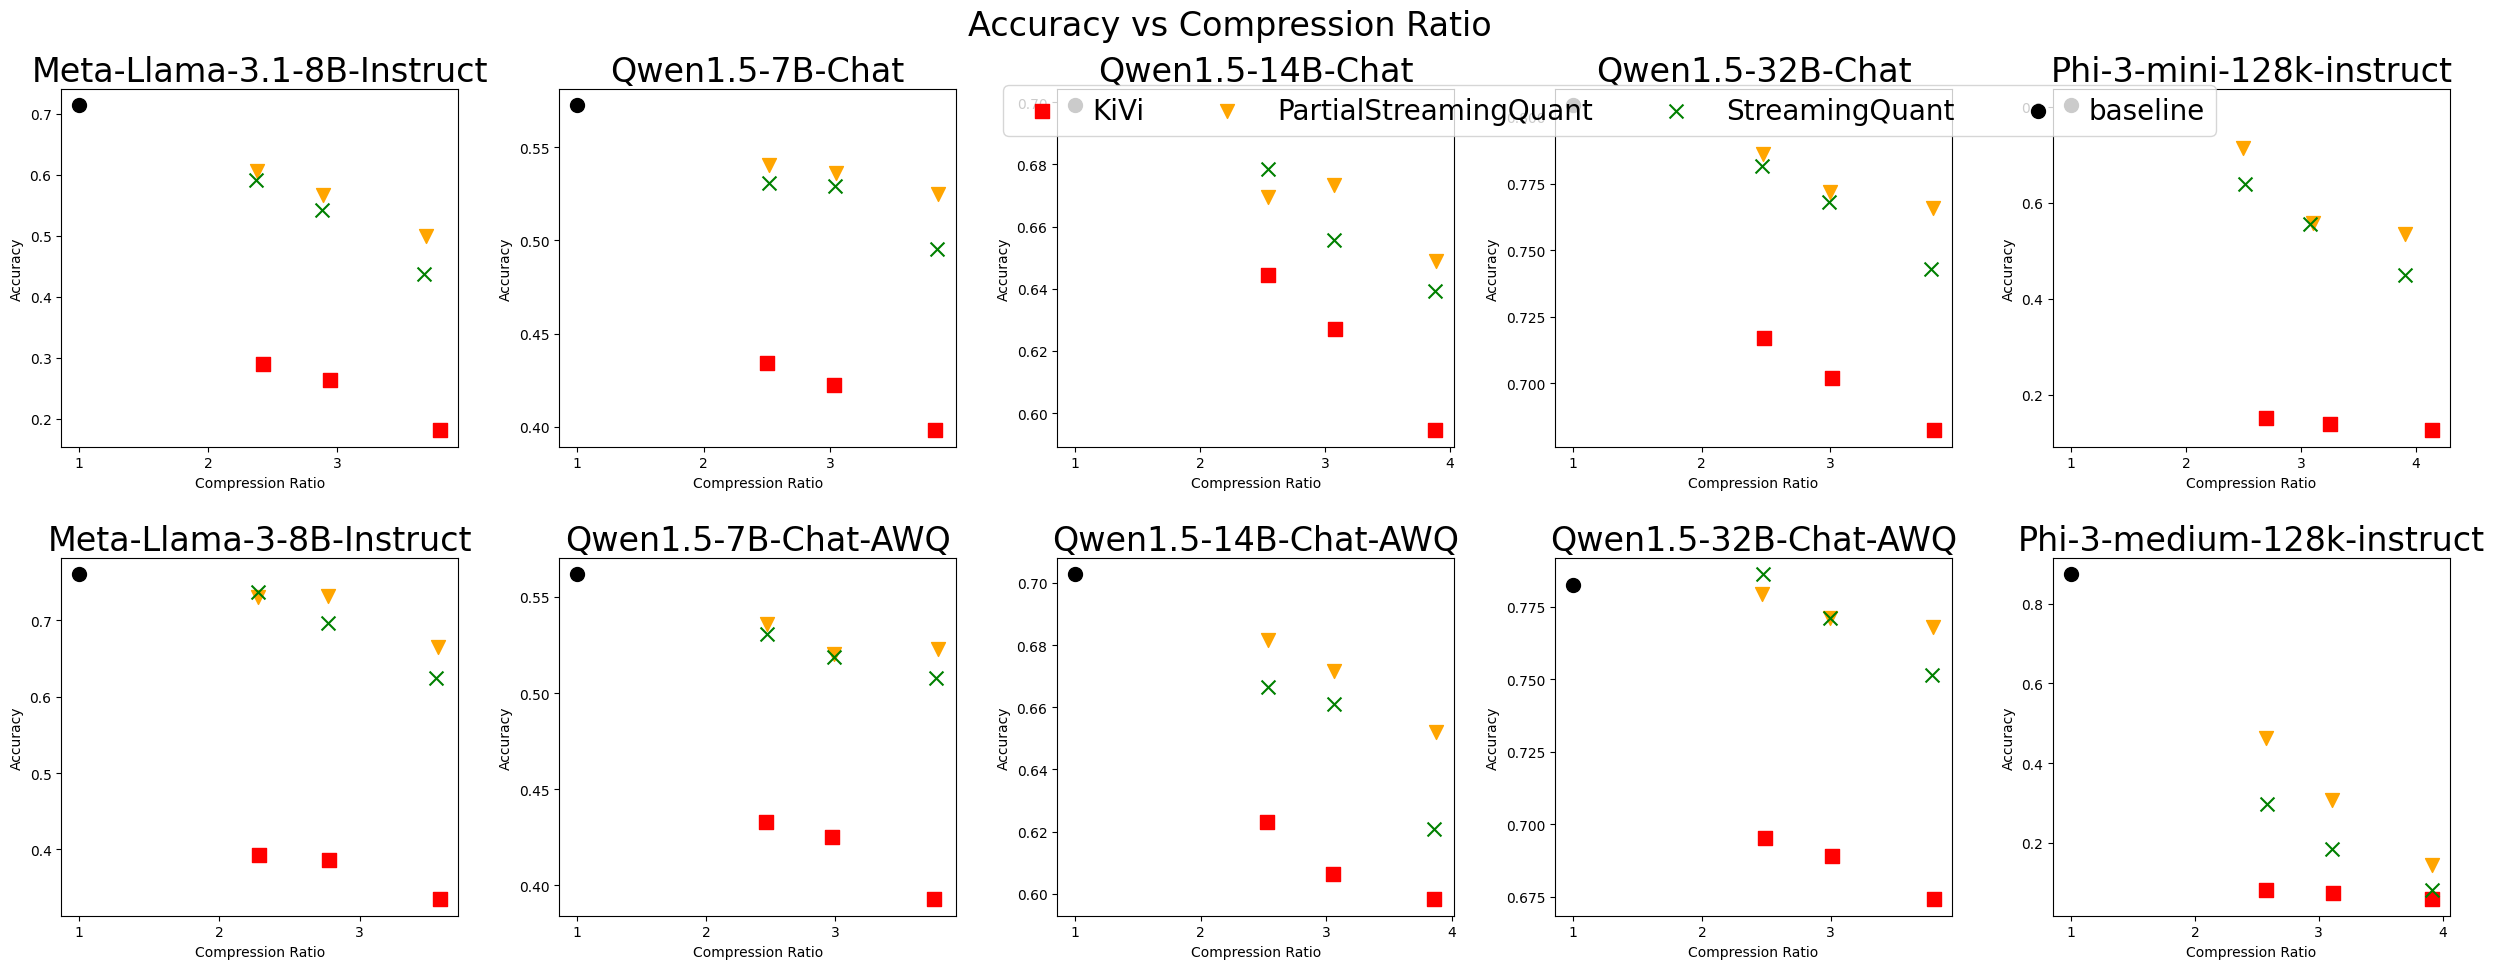

In [14]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
#放大字体
plt.rcParams.update({'font.size': 20})
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen1.5-32B-Chat-AWQ',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %2, (i//2) % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Log" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-2.68, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio_Streaming.png", dpi=600)
plt.show()

In [15]:
models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen2-7B-Instruct',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %2, (i//2) % 5]
    df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
    s = ''
    for method in ['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant']:
        method_data = df_model[df_model['method'] == method]
        if method != 'baseline':
            method_data = method_data[method_data['compression ratio'] > 3.5]
        s += f'& {method_data["accuracy"].mean():.2f} '
    print(f'{model}: {s}')
        

Meta-Llama-3.1-8B-Instruct: & 71.42 & 18.04 & 40.41 & 50.64 
Meta-Llama-3-8B-Instruct: & 76.04 & 33.43 & 63.68 & 69.29 
Qwen1.5-7B-Chat: & 57.24 & 39.80 & 49.66 & 52.08 
Qwen1.5-7B-Chat-AWQ: & 56.18 & 39.27 & 49.28 & 50.57 
Qwen1.5-14B-Chat: & 69.90 & 59.44 & 62.02 & 64.90 
Qwen1.5-14B-Chat-AWQ: & 70.28 & 59.82 & 63.31 & 65.50 
Qwen1.5-32B-Chat: & 80.44 & 68.23 & 75.97 & 76.50 
Qwen2-7B-Instruct: & 52.99 & 3.71 & 34.34 & 36.47 
Phi-3-mini-128k-instruct: & 80.29 & 12.59 & 51.86 & 52.39 
Phi-3-medium-128k-instruct: & 87.34 & 5.84 & 22.44 & 37.00 


/tmp/ipykernel_7645/2589075095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_7645/2589075095.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
/tmp/ipykernel_7645/2589075095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/tmp/ipykernel_7645/1413142043.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_7645/1413142043.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
/tmp/ipykernel_7645/1413142043.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

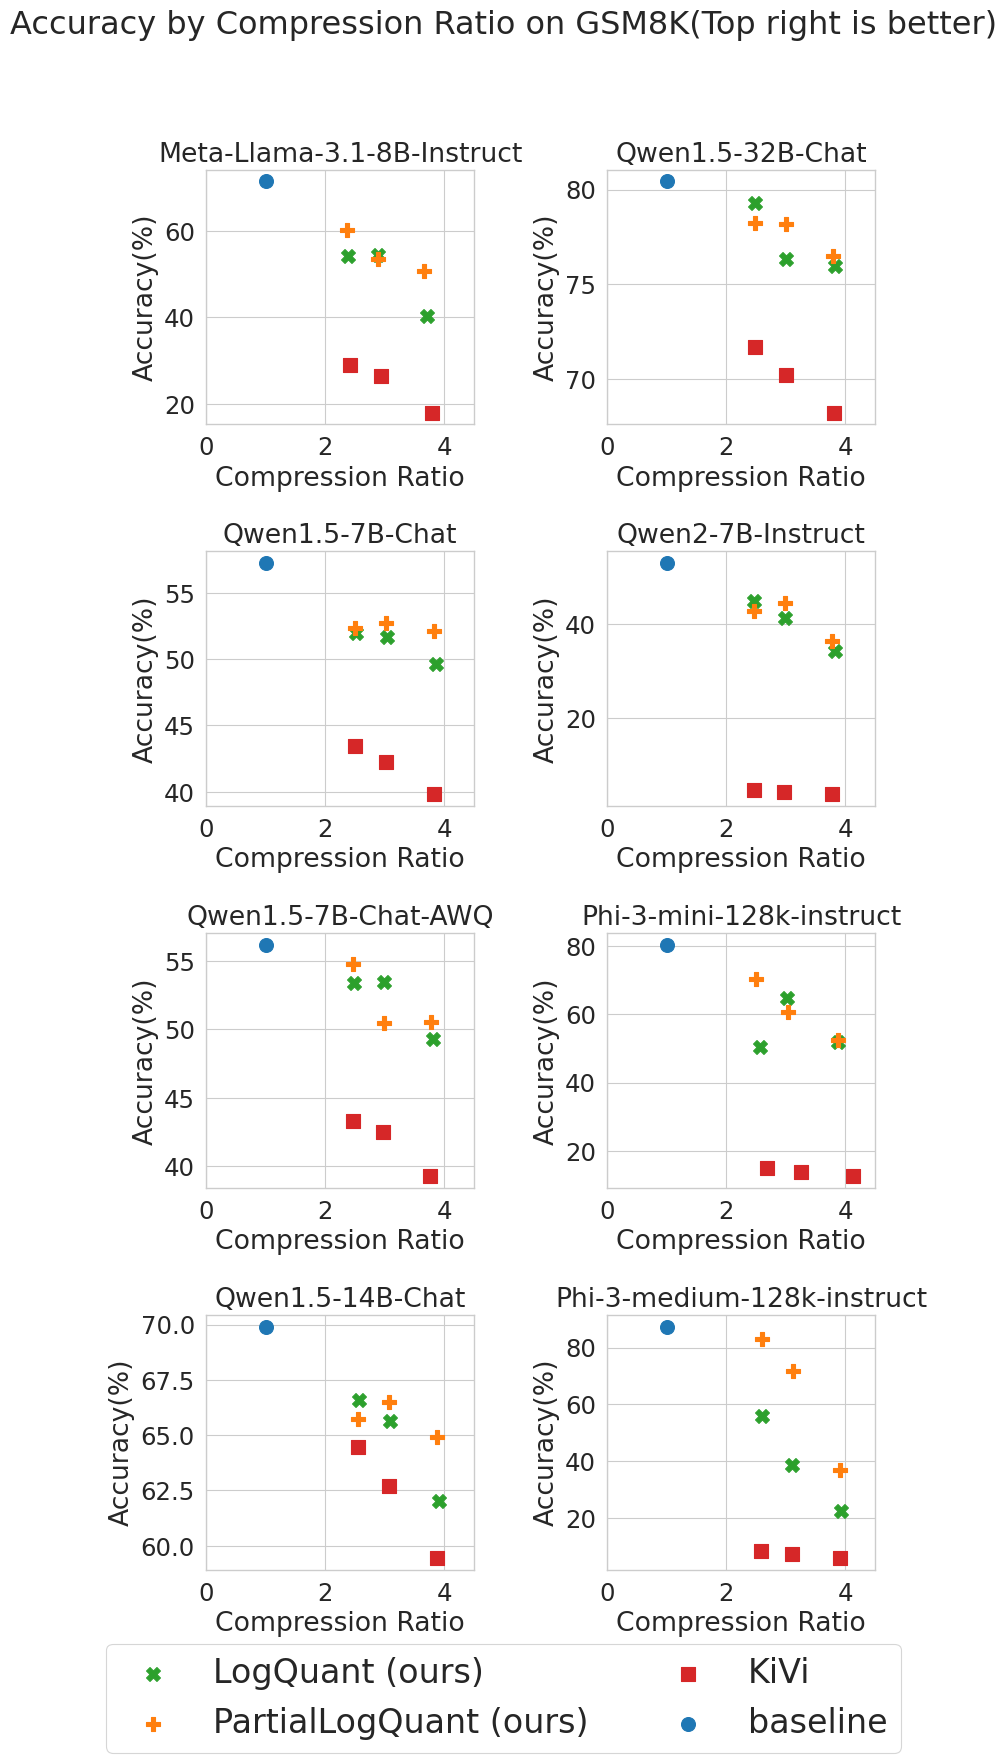

In [39]:
import numpy as np
import random
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
#get 4 colors from tab10
colors = sns.color_palette("tab10", 6)
# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': colors[0], 'marker': 'o'},
    'KiVi': {'color': colors[3], 'marker': 's'},
    'LogQuant': {'color': colors[2], 'marker': 'X'},
    'PartialLogQuant': {'color': colors[1], 'marker': 'P'},
}

fig, axs = plt.subplots(4, 2, figsize=(8, 20))

models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', #'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', #'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen2-7B-Instruct',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %4, (i//4) % 2]
    df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Stream" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy(%)')
    ax.set_xlim(0, 4.5)
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.2, wspace=0.5, hspace=0.5)
lines, labels = fig.axes[-1].get_legend_handles_labels()
#if Log in labels, add (ours) to the end of the label
for i in range(len(labels)):
    if "Log" in labels[i]:
        labels[i] += " (ours)"
fig.legend(lines, labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.1), fontsize=24)
fig.suptitle('Accuracy by Compression Ratio on GSM8K(Top right is better)')
plt.savefig("results/accuracy_vs_compression_ratio_Log.pdf", dpi=600, bbox_inches='tight')
plt.show()

/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set 

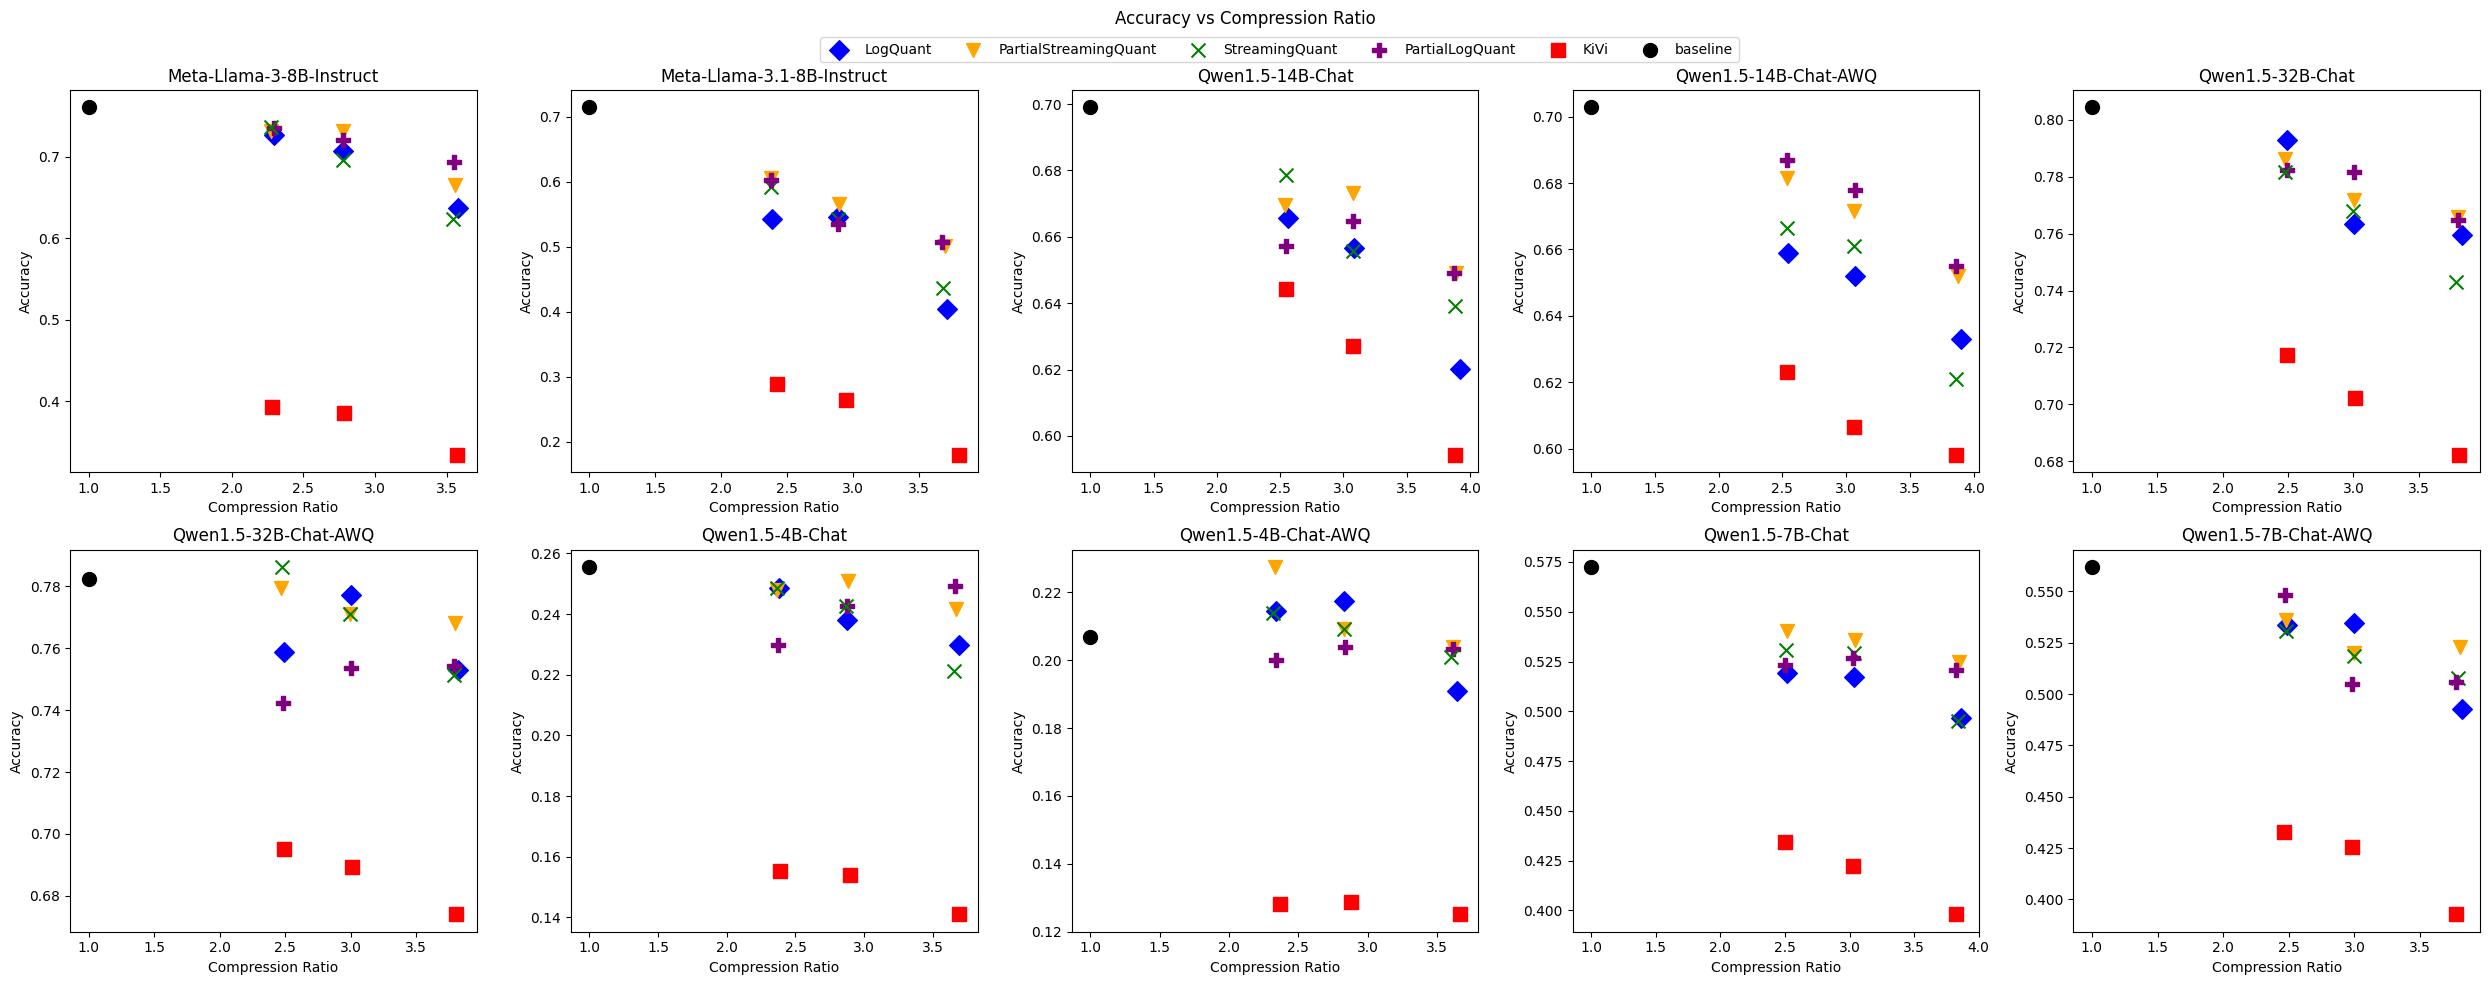

In [41]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [model for model in models if '1.8B' not in model]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i // 5, i % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-3.1, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio.png", dpi=600)
plt.show()